In [2]:
import math
def chgt_coord(mat):
    
    mat_x = [[0 for _ in range(8)] for _ in range(8)]
    mat_y = [[0 for _ in range(8)] for _ in range(8)]
    mat_z = [[0 for _ in range(8)] for _ in range(8)]
    mat_dec = [-7,-5,-3,-1,1,3,5,7]
    angle = 4 #64/8/2
    for i in range(8) :
        for j in range(8):
            R = mat[i][j]
            B = math.sin((math.pi*(-mat_dec[j])*angle)/180)
            A = math.cos((math.pi*(-mat_dec[j])*angle)/180)
            C = math.sin((math.pi*mat_dec[i]*angle)/180)
            D = math.cos((math.pi*mat_dec[i]*angle)/180)

            mat_x[i][j] = R*A*D
            mat_y[i][j] = R*A*C
            mat_z[i][j] = R*B
    return [mat_x,mat_y,mat_z]

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualisation_3D(mat_xyz):
    # Créez une figure 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Tracez les données en 3D
    ax.scatter(mat_xyz[0], mat_xyz[1], mat_xyz[2], c='r', marker='o')

    # Étiquetez les axes
    ax.set_xlabel('Axe X')
    ax.set_ylabel('Axe Y')
    ax.set_zlabel('Axe Z')

    # Affichez la figure
    plt.show()

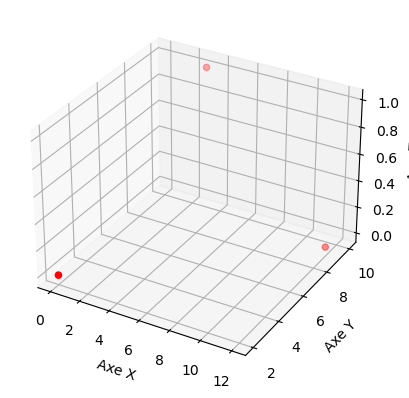

In [4]:
visualisation_3D([[0,12,3],[2,9,10],[0,0,1]])

In [9]:
import numpy as np
import pandas as pd
import re

with open('hamza.txt', 'r') as file:
    lines = file.read()
    

    
lines = lines.replace("|", ".")
lines = lines.replace(":", ".")
lines = lines.replace("53L5A1", "")

lines = lines.replace("X", "0")

lines = re.sub(r'[^0-9.]', '', lines)


lines = lines.split('.')

lines = [i for i in lines if i != '']   

res=[eval(i) for i in lines]

#print(res)

n = len(res)//4

data = np.zeros((n, 4), dtype = int)

up = []
down = []

for i in range(len(res)):
    j = i%32
    if j >= 16:
        
        down.append(res[i])
    else:
        up.append(res[i])

print(len(up)/64, len(down)/64)
# assert len(up) == len(down) 
#print(up)
#print(down)

for i in range(len(up)):
    
    if i%2 == 0:
        data[i//2, 0] = up[i]
        data[i//2, 2] = down[i]
    else:
        data[i//2, 1] = up[i]
        data[i//2, 3] = down[i]
    
#print('resultat',data.reshape(-1,64,4))
#print("mes resultat",data)

    

FileNotFoundError: [Errno 2] No such file or directory: 'hamza.txt'

In [ ]:
print(data)
visualisation_3D(chgt_coord(data))